In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import random

# Suppress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [5]:
# Load your dataset
df = pd.read_excel("/content/drive/MyDrive/Corrected_Batting_Strike_Rate_Final.xlsx")

# Show first few rows
df.head()

,player,country,runs,balls faced,4s,6s,strike rate,opposition,venue country,year,venue type
0,AJ Finch,Australia,172,76,16,10,226.31,Zimbabwe,Zimbabwe,2018,away
1,Hazratullah Zazai,Afghanistan,162,62,11,16,261.29,Ireland,India,2019,neutral
2,AJ Finch,Australia,156,63,11,14,247.61,England,England,2013,away
3,GJ Maxwell,Australia,145,65,14,9,223.07,Sri Lanka,Sri Lanka,2016,away
4,SR Watson,Australia,124,71,10,6,174.64,India,Australia,2016,home


## Data Preprocessing

In [6]:
df.drop("venue country", axis=1, inplace=True)


In [7]:
df = df.rename(columns={
    'country': "player_country",
    'opposition': 'opposition_country',
    'balls faced': 'BF',
    'strike rate': 'strike_rate',
    'venue type': 'venue_type'
})


In [8]:
df["runs"].unique()
#returns an array of all the unique values in the "runs" column of the df DataFrame

array([172, 162, 156, 145, 124, 123, 122, 119, 118, 117, 116, 114, 113,
       112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 101, 100,  99,
        98,  97,  96,  95,  94,  93,  92,  91,  90,  89,  88,  87,  86,
        85,  84,  83,  82,  81,  80,  79,  78,  77,  76,  75,  74,  73,
        72,  71,  70,  69,  68,  67,  66,  65,  64,  63,  62,  61,  60,
        59,  58,  57,  56,  55,  54,  53,  52,  51,  50,  49,  48,  47,
        46,  45,  44,  43,  42,  41,  40,  39,  38,  37,  36,  35,  34,
        33,  32,  31,  30,  29,  28,  27,  26,  25,  24,  23,  22,  21,
        20,  19,  18,  17,  16,  15,  14,  13,  12,  11,  10,   9,   8,
         7,   6,   5,   4,   3,   2,   1,   0])

In [9]:
df[~df["runs"].astype(str).str.isnumeric()]["runs"].value_counts()


,count
runs,


In [10]:
df["runs"] = pd.to_numeric(df["runs"])


In [43]:
df

,player,player_country,runs,BF,4s,6s,strike_rate,opposition_country,year,venue_type
0,AJ Finch,Australia,172,76,16,10,226.31,Zimbabwe,2018,away
1,Hazratullah Zazai,Afghanistan,162,62,11,16,261.29,Ireland,2019,neutral
2,AJ Finch,Australia,156,63,11,14,247.61,England,2013,away
3,GJ Maxwell,Australia,145,65,14,9,223.07,Sri Lanka,2016,away
4,SR Watson,Australia,124,71,10,6,174.64,India,2016,home
...,...,...,...,...,...,...,...,...,...,...
16349,Babar Azam,Pakistan,0,1,0,0,0.00,India,2022,neutral
16350,Taskin Ahmed,Bangladesh,0,1,0,0,0.00,Netherlands,2022,neutral
16351,Vikramjit Singh,Netherlands,0,1,0,0,0.00,Bangladesh,2022,neutral
16352,BFW de Leede,Netherlands,0,1,0,0,0.00,Bangladesh,2022,neutral


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16354 entries, 0 to 16353
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   player              16354 non-null  object 
 1   player_country      16353 non-null  object 
 2   runs                16354 non-null  int64  
 3   BF                  16354 non-null  int64  
 4   4s                  16354 non-null  int64  
 5   6s                  16354 non-null  int64  
 6   strike_rate         16354 non-null  float64
 7   opposition_country  16354 non-null  object 
 8   year                16354 non-null  int64  
 9   venue_type          16354 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 1.2+ MB


In [44]:
# Save df_final to disk as CSV or Excel
df.to_csv("/content/drive/MyDrive/SMAI_project/df.csv", index=False)

## Data Visualization

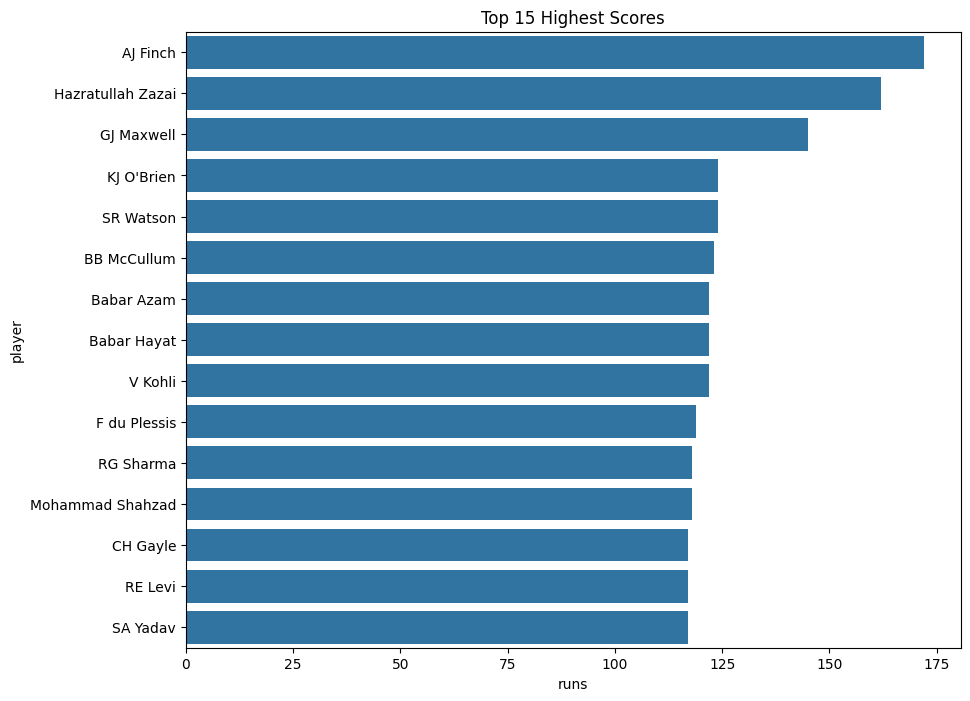

In [13]:
highest_scores = df.groupby(["player"])["runs"].max().reset_index()

# Get top 15 highest scores
highest_scores.sort_values(by="runs", ascending=False, inplace=True)
plt.figure(figsize=(10, 8))
sns.barplot(x="runs", y="player", data=highest_scores[:15])
plt.title("Top 15 Highest Scores")
plt.show()

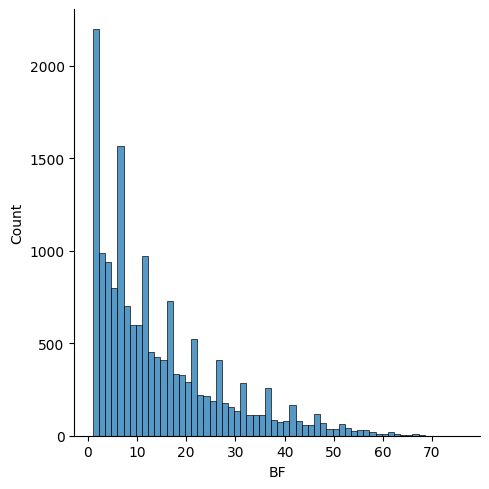

In [14]:
sns.displot(df["BF"])


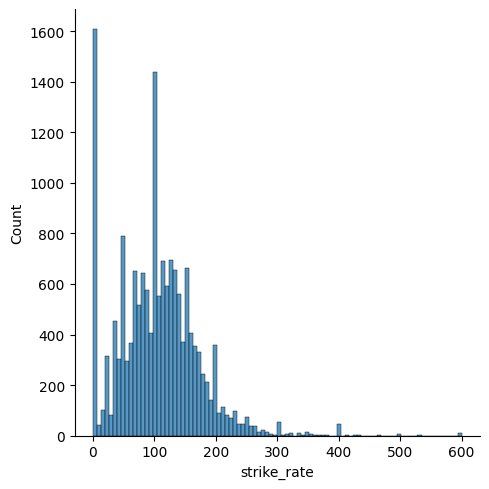

In [15]:
sns.displot(df["strike_rate"])


<Axes: >

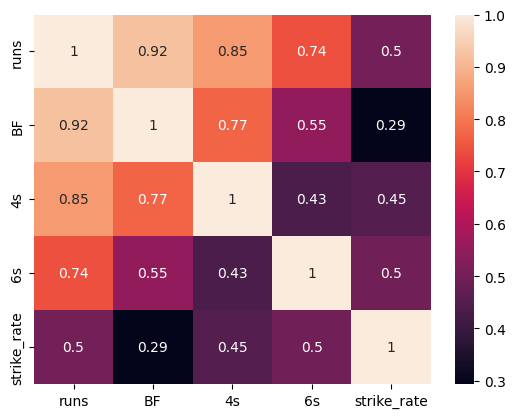

In [16]:
heatmap_df = df[["runs", "BF", "4s", "6s", "strike_rate"]]
sns.heatmap(heatmap_df.corr(), annot=True)

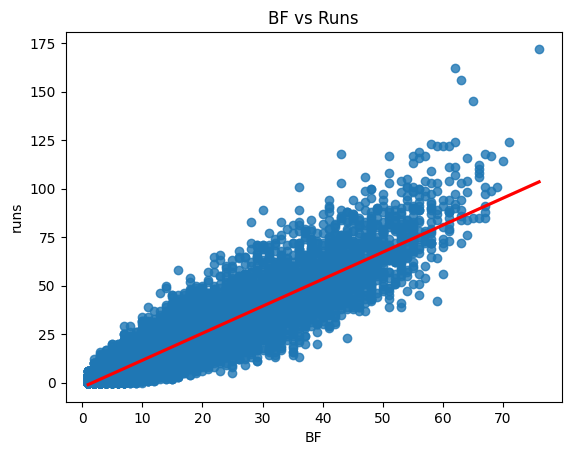

In [17]:
sns.regplot(x="BF", y="runs", data=df, line_kws={"color": "red"})
plt.title("BF vs Runs")
plt.show()

## Datatype conversion

### One Hot Encoding

In [18]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder for newer versions of scikit-learn
encoder = OneHotEncoder(sparse_output=False, dtype=int)

# Fit and transform
encoded_array = encoder.fit_transform(df[["player_country", "opposition_country", "venue_type"]])

# Get column names
encoded_col_names = encoder.get_feature_names_out(["player_country", "opposition_country", "venue_type"])

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoded_col_names)

# View first few rows
print(encoded_df.head())



   player_country_ United Arab Emirates  player_country_Afghanistan  \
0                                     0                           0   
1                                     0                           1   
2                                     0                           0   
3                                     0                           0   
4                                     0                           0   

   player_country_Australia  player_country_Bahraim  player_country_Bahrain  \
0                         1                       0                       0   
1                         0                       0                       0   
2                         1                       0                       0   
3                         1                       0                       0   
4                         1                       0                       0   

   player_country_Bangladesh  player_country_Bermuda  player_country_Botswana  \
0                

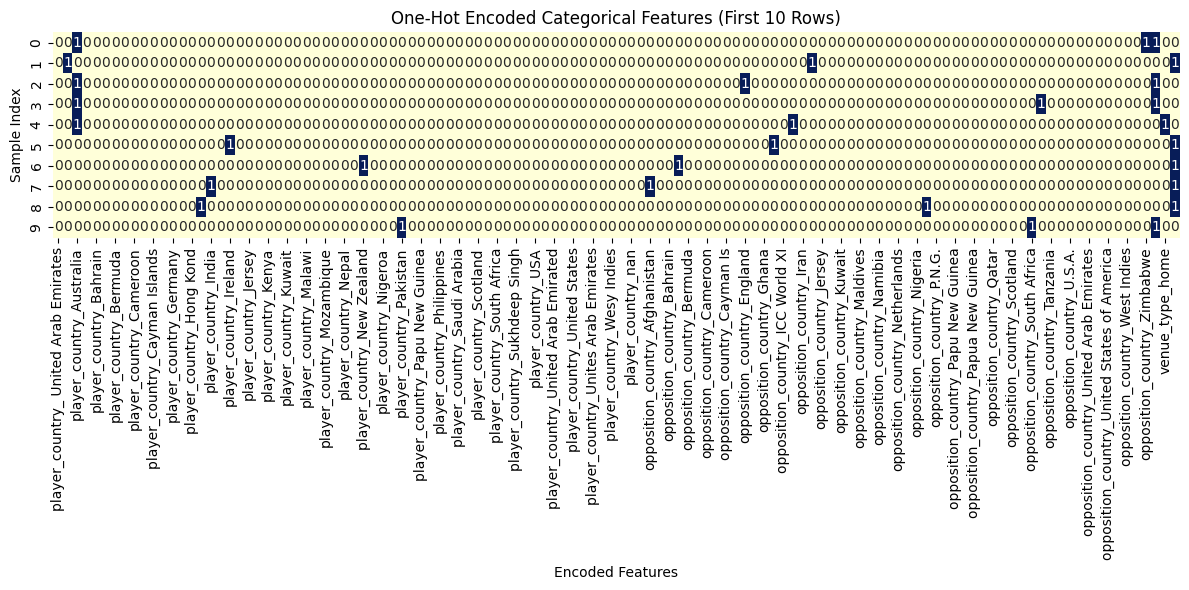

In [19]:
plt.figure(figsize=(12, 6))
sns.heatmap(encoded_df.head(10), annot=True, cmap="YlGnBu", cbar=False)
plt.title("One-Hot Encoded Categorical Features (First 10 Rows)")
plt.xlabel("Encoded Features")
plt.ylabel("Sample Index")
plt.tight_layout()
plt.show()


In [20]:
# Step 1: Drop unencoded columns from the original dataframe
df_dropped = df.drop(columns=['player_country', 'opposition_country','venue_type'])

# Step 2: Concatenate the dropped dataframe with the encoded columns
# Ensure that the indices match between df_dropped and encoded_df
df_final = pd.concat([df_dropped.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)


In [21]:
df_final

,player,runs,BF,4s,6s,strike_rate,year,player_country_ United Arab Emirates,player_country_Afghanistan,player_country_Australia,...,opposition_country_United Arab Emirates,opposition_country_United States if America,opposition_country_United States of America,opposition_country_Unites Arab Emirates,opposition_country_West Indies,opposition_country_World-XI,opposition_country_Zimbabwe,venue_type_away,venue_type_home,venue_type_neutral
0,AJ Finch,172,76,16,10,226.31,2018,0,0,1,...,0,0,0,0,0,0,1,1,0,0
1,Hazratullah Zazai,162,62,11,16,261.29,2019,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,AJ Finch,156,63,11,14,247.61,2013,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,GJ Maxwell,145,65,14,9,223.07,2016,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,SR Watson,124,71,10,6,174.64,2016,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16349,Babar Azam,0,1,0,0,0.00,2022,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16350,Taskin Ahmed,0,1,0,0,0.00,2022,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16351,Vikramjit Singh,0,1,0,0,0.00,2022,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16352,BFW de Leede,0,1,0,0,0.00,2022,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
# Save df_final to disk as CSV or Excel
df_final.to_csv("/content/drive/MyDrive/SMAI_project/df_final.csv", index=False)


## Model Building

In [28]:
import pandas as pd
import numpy as np
import joblib
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Regression Models
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    GradientBoostingRegressor,
    AdaBoostRegressor,
    BaggingRegressor,
    RandomForestRegressor
)


In [29]:
# Define the target variable
y = df_final['runs']

# Define the feature set (everything except 'runs')
X = df_final.drop(columns=['runs'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)


#### Random Forest Regressor

In [30]:
# train.py
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


# Define the target variable
y = df_final["runs"]

# Define the feature set (everything except 'runs')
X = df_final[["4s", "6s", "strike_rate", "BF", "year"]]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train RandomForest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save model to disk
joblib.dump(model, "/content/drive/MyDrive/SMAI_project/random_forest_model.pkl")
print("Model trained and saved as random_forest_model.pkl")



Model trained and saved as random_forest_model.pkl


#### Decision Tree Regressor

In [31]:
# Define the target variable
y = df_final["runs"]

# Define the feature set
X = df_final[["4s", "6s", "strike_rate", "BF", "year"]]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Save model to disk
joblib.dump(model, "/content/drive/MyDrive/SMAI_project/decision_tree_model.pkl")
print("Model trained and saved as decision_tree_model.pkl")


Model trained and saved as decision_tree_model.pkl


#### Gradient Boosting Regressor

In [32]:
# Define target and features
y = df_final["runs"]
X = df_final[["4s", "6s", "strike_rate", "BF", "year"]]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, "/content/drive/MyDrive/SMAI_project/gradient_boosting_model.pkl")
print("Model trained and saved as gradient_boosting_model.pkl")


Model trained and saved as gradient_boosting_model.pkl


#### Ada Boosting Regressor

In [33]:
# Define target and features
y = df_final["runs"]
X = df_final[["4s", "6s", "strike_rate", "BF", "year"]]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train AdaBoost Regressor
model = AdaBoostRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, "/content/drive/MyDrive/SMAI_project/adaboost_model.pkl")
print("Model trained and saved as adaboost_model.pkl")


Model trained and saved as adaboost_model.pkl


#### Gaussian Process Regressor

In [37]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process import GaussianProcessRegressor

X = df_final[["4s", "6s", "strike_rate", "BF", "year"]]
y = df_final["runs"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Kernel with fixed parameters (no optimization overhead)
kernel = C(1.0, constant_value_bounds="fixed") * RBF(1.0, length_scale_bounds="fixed")

# Train Gaussian Process model
model = GaussianProcessRegressor(kernel=kernel, optimizer=None)
model.fit(X_train, y_train)

# Save model to disk
joblib.dump(model, "/content/drive/MyDrive/SMAI_project/gaussian_process_model.pkl")
print("Gaussian Process model trained and saved as gaussian_process_model.pkl")



Gaussian Process model trained and saved as gaussian_process_model.pkl


#### Bagging Regressor

In [36]:
# Features and target
X = df_final[["4s", "6s", "strike_rate", "BF", "year"]]
y = df_final["runs"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Bagging Regressor (using DecisionTree as the base estimator)
model = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)

# Train model
model.fit(X_train, y_train)

# Save model to disk
joblib.dump(model, "/content/drive/MyDrive/SMAI_project/bagging_regressor_model.pkl")
print("Bagging Regressor model trained and saved as bagging_regressor_model.pkl")


Bagging Regressor model trained and saved as bagging_regressor_model.pkl


### Generalization

In [92]:
import joblib
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    GradientBoostingRegressor,
    AdaBoostRegressor,
    BaggingRegressor,
    RandomForestRegressor,
)
from sklearn.model_selection import train_test_split

def build_model(df, player_country, opposition_country, venue_type):
    # Filter rows for the specified player_country, opposition_country, and venue_type
    player_df = df[
        (df["player_country"] == player_country) &
        (df["opposition_country"] == opposition_country) &
        (df["venue_type"] == venue_type)
    ]

    if player_df.empty:
        print("No data available for the given combination.")
        return None

    # Features and target variable
    X = player_df[["4s", "6s", "strike_rate", "BF", "year"]]
    y = player_df["runs"]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

    model_dict = {}

    models = {
        "KNeighborsRegressor": KNeighborsRegressor(),
        "GaussianProcessRegressor": GaussianProcessRegressor(),
        "DecisionTreeRegressor": DecisionTreeRegressor(),
        "GradientBoostingRegressor": GradientBoostingRegressor(),
        "AdaBoostRegressor": AdaBoostRegressor(),
        "BaggingRegressor": BaggingRegressor(),
        "RandomForestRegressor": RandomForestRegressor(),
    }

    for name, model in models.items():
        try:
            model.fit(X_train, y_train)
            score = model.score(X_test, y_test)
            model_dict[name] = {"model": model, "score": score}
        except Exception as e:
            print(f"Failed to train {name}: {e}")

    print("\nModel Scores (R2):")
    for model_name, model_info in model_dict.items():
        print(f"{model_name}: {model_info['score']:.4f}")

    # Select and save the best model
    best_model_name = max(model_dict, key=lambda k: model_dict[k]["score"])
    best_model = model_dict[best_model_name]["model"]
    best_score = model_dict[best_model_name]["score"]

    print(f"\nBest Model: {best_model_name} with score {best_score:.4f}")

    # Save best model to disk
    model_filename = f"best_model_{player_country}_{opposition_country}_{venue_type}.pkl"
    joblib.dump(best_model, model_filename)
    print(f"Best model saved as: {model_filename}")

    return model_dict, best_model, X_train, X_test, y_train, y_test, player_df


In [38]:
# model_dict, best_model, X_train, X_test, y_train, y_test, player_df = build_model(
#     df, player_country="India", opposition_country="Australia", venue_type="away"
# )


## Prediction of runs

In [90]:
def predict_runs_for_team(df, model, player_country, opposition_country, venue_type):
    # Filter the dataframe based on the specified player_country, opposition_country, and venue_type
    filtered_df = df[
        (df["player_country"] == player_country) &
        (df["opposition_country"] == opposition_country) &
        (df["venue_type"] == venue_type)
    ]

    if filtered_df.empty:
        print("No data found for this combination.")
        return None

    # Ensure that the data used for prediction is correctly preprocessed
    feature_cols = ["4s", "6s", "strike_rate", "year", "BF", "player_country", "opposition_country", "venue_type"]

    # Handle missing data if any (can fill with zeros or mean depending on your requirement)
    filtered_df = filtered_df.fillna(0)  # Or you can choose other methods like mean or median

    # Prepare the features (X)
    X = filtered_df[feature_cols].copy()

    # Ensure categorical variables are encoded (if necessary)
    # Check if the model has been trained with the correct encoding
    if hasattr(model, "transform") and callable(getattr(model, "transform", None)):
        X = model.named_steps["preprocessor"].transform(X)  # If model includes preprocessing steps (like one-hot encoding)

    # Predict the runs for the filtered data
    predicted_runs = model.predict(X)

    # Create a DataFrame with the player names and their predicted runs
    result_df = filtered_df[["player"]].copy()
    result_df["predicted_runs"] = predicted_runs

    return result_df


## Prediction of top 4 batters

In [39]:
# Function to predict runs for a given DataFrame and best model
def predict_top_batters(player_df, best_model, top_n=4):
    # Prepare the feature columns
    X = player_df[["4s", "6s", "strike_rate", "BF", "year"]].copy()

    # Predict using the best model
    predicted_runs = best_model.predict(X)

    # Add predictions to DataFrame
    results_df = player_df[["player", "player_country", "opposition_country", "venue_type"]].copy()
    results_df["predicted_runs"] = predicted_runs

    # Remove duplicates and get highest prediction per player
    results_unique = results_df.groupby("player", as_index=False)["predicted_runs"].max()

    # Add context columns back (optional, for clarity)
    context = results_df.drop_duplicates(subset=["player"])[["player", "player_country", "opposition_country", "venue_type"]]
    final_results = pd.merge(results_unique, context, on="player", how="left")

    # Sort by predicted runs and return top N batters
    top_batters = final_results.sort_values(by="predicted_runs", ascending=False).head(top_n)

    return top_batters


In [40]:
# # Predict and get top 4 batters
# top_4_batters = predict_top_batters(player_df, best_model, top_n=4)

# # Display results
# print(top_4_batters)